In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import json
import pathlib

In [2]:
suffix = "mscred"
group = "magnetics"

In [ ]:
file_path = f"data/raw"
path = pathlib.Path().absolute().parent.parent / file_path / f"data_{group}.nc"

with (xr.open_dataset(path) as train):
    #subset = train.sel(shot_id=shots[])
    data_train = train.load()

In [ ]:
data_train

<xarray.Dataset> Size: 13GB
Dimensions:                                   (time: 12877819,
                                               b_field_pol_probe_cc_channel: 5,
                                               b_field_pol_probe_ccbv_channel: 40,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 18,
                                               b_field_pol_probe_omv_channel: 3,
                                               b_field_tor_probe_cc_channel: 3,
                                               b_field_tor_probe_saddle_field_channel: 12,
                                               b_field_tor_probe_saddle_voltage_channel: 12,
                                               flux_loop_channel: 15)
Coordinates:
  * b_field_pol_probe_cc_channel              (b_field_pol_probe_cc_channel) <U13 260B ...
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) <U10 2kB ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) <U9 648B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) <U9 648B ...
  * b_field_pol_probe_omv_channel             (b_field_pol_probe_omv_channel) <U11 132B ...
  * b_field_tor_probe_cc_channel              (b_field_tor_probe_cc_channel) <U13 156B ...
  * b_field_tor_probe_saddle_field_channel    (b_field_tor_probe_saddle_field_channel) <U11 528B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) <U15 720B ...
  * flux_loop_channel                         (flux_loop_channel) <U12 720B '...
  * time                                      (time) float64 103MB -0.0692 .....
Data variables:
    b_field_pol_probe_cc_field                (time, b_field_pol_probe_cc_channel) float64 515MB ...
    b_field_pol_probe_ccbv_field              (time, b_field_pol_probe_ccbv_channel) float64 4GB ...
    b_field_pol_probe_obr_field               (time, b_field_pol_probe_obr_channel) float64 2GB ...
    b_field_pol_probe_obv_field               (time, b_field_pol_probe_obv_channel) float64 2GB ...
    b_field_pol_probe_omv_voltage             (time, b_field_pol_probe_omv_channel) float64 309MB ...
    b_field_tor_probe_cc_field                (time, b_field_tor_probe_cc_channel) float64 309MB ...
    b_field_tor_probe_saddle_field            (time, b_field_tor_probe_saddle_field_channel) float64 1GB ...
    b_field_tor_probe_saddle_voltage          (time, b_field_tor_probe_saddle_voltage_channel) float64 1GB ...
    flux_loop_flux                            (time, flux_loop_channel) float64 2GB ...
    ip                                        (time) float64 103MB -354.1 ......
    shot_index                                (time) int64 103MB 0 0 ... 6117
Attributes:
    description:  
    imas:         magnetics
    label:        Plasma Current
    name:         magnetics
    uda_name:     AMC_PLASMA CURRENT
    units:        A

In [19]:
print(f"{'Variable':<40} {'Shape':<20} {'Dims':<55} {'NaN Count':<10}")
for var in data_train.data_vars:
    shape = data_train[var].shape
    dims = data_train[var].dims
    nan_count = data_train[var].isnull().sum().values
    print(f"{var:<40} {str(shape):<20} {str(dims):<55} {nan_count:<10}")

Variable                                 Shape                Dims                                                    NaN Count 
b_field_pol_probe_cc_field               (12877819, 5)        ('time', 'b_field_pol_probe_cc_channel')                28787838  
b_field_pol_probe_ccbv_field             (12877819, 40)       ('time', 'b_field_pol_probe_ccbv_channel')              12139972  
b_field_pol_probe_obr_field              (12877819, 18)       ('time', 'b_field_pol_probe_obr_channel')               50940     
b_field_pol_probe_obv_field              (12877819, 18)       ('time', 'b_field_pol_probe_obv_channel')               12925929  
b_field_pol_probe_omv_voltage            (12877819, 3)        ('time', 'b_field_pol_probe_omv_channel')               8330381   
b_field_tor_probe_cc_field               (12877819, 3)        ('time', 'b_field_tor_probe_cc_channel')                23640910  
b_field_tor_probe_saddle_field           (12877819, 12)       ('time', 'b_field_tor_probe_saddle_

In [20]:
file_path = f"notebooks/result_files/all_shots_{group}"
path = pathlib.Path().absolute().parent.parent / file_path / f"result_lists_{group}.json"

with open(path, "r") as f:
    data = json.load(f)
    good_vars_name = data["good_vars_ids"]

good_vars_name

['b_field_pol_probe_obr_field::AMB_OBR01',
 'b_field_pol_probe_obr_field::AMB_OBR04',
 'b_field_pol_probe_obr_field::AMB_OBR05',
 'b_field_pol_probe_obr_field::AMB_OBR06',
 'b_field_pol_probe_obr_field::AMB_OBR07',
 'b_field_pol_probe_obr_field::AMB_OBR08',
 'b_field_pol_probe_obr_field::AMB_OBR09',
 'b_field_pol_probe_obr_field::AMB_OBR10',
 'b_field_pol_probe_obr_field::AMB_OBR12',
 'b_field_pol_probe_obr_field::AMB_OBR13',
 'b_field_pol_probe_obr_field::AMB_OBR14',
 'b_field_pol_probe_obr_field::AMB_OBR15',
 'b_field_pol_probe_obr_field::AMB_OBR16',
 'b_field_pol_probe_obr_field::AMB_OBR17',
 'b_field_pol_probe_obr_field::AMB_OBR18',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M01',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M02',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M03',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M04',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M05',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M06',
 'b_field_tor_probe_saddle_volt

In [21]:
# Variable and channel names separation
var_channel_df = pd.DataFrame(good_vars_name, columns=["full_name"])
var_channel_df[["variable", "channel"]] = var_channel_df["full_name"].str.split("::", expand=True)
var_channel_df.head(37)


,full_name,variable,channel
0,b_field_pol_probe_obr_field::AMB_OBR01,b_field_pol_probe_obr_field,AMB_OBR01
1,b_field_pol_probe_obr_field::AMB_OBR04,b_field_pol_probe_obr_field,AMB_OBR04
2,b_field_pol_probe_obr_field::AMB_OBR05,b_field_pol_probe_obr_field,AMB_OBR05
3,b_field_pol_probe_obr_field::AMB_OBR06,b_field_pol_probe_obr_field,AMB_OBR06
4,b_field_pol_probe_obr_field::AMB_OBR07,b_field_pol_probe_obr_field,AMB_OBR07
5,b_field_pol_probe_obr_field::AMB_OBR08,b_field_pol_probe_obr_field,AMB_OBR08
6,b_field_pol_probe_obr_field::AMB_OBR09,b_field_pol_probe_obr_field,AMB_OBR09
7,b_field_pol_probe_obr_field::AMB_OBR10,b_field_pol_probe_obr_field,AMB_OBR10
8,b_field_pol_probe_obr_field::AMB_OBR12,b_field_pol_probe_obr_field,AMB_OBR12
9,b_field_pol_probe_obr_field::AMB_OBR13,b_field_pol_probe_obr_field,AMB_OBR13


In [22]:
channel_counts = var_channel_df.groupby("variable").size().sort_values(ascending=False)
channel_counts

variable
b_field_pol_probe_ccbv_field        36
b_field_pol_probe_obr_field         15
flux_loop_flux                      14
b_field_pol_probe_obv_field         13
b_field_tor_probe_saddle_voltage     9
b_field_tor_probe_saddle_field       8
ip                                   1
dtype: int64

In [23]:
set(var_channel_df["variable"])

{'b_field_pol_probe_ccbv_field',
 'b_field_pol_probe_obr_field',
 'b_field_pol_probe_obv_field',
 'b_field_tor_probe_saddle_field',
 'b_field_tor_probe_saddle_voltage',
 'flux_loop_flux',
 'ip'}

In [24]:
def filter_xr_dataset_channels(data_train: xr.Dataset, var_channel_df: pd.DataFrame) -> xr.Dataset:
    """
    Filters the channels of the data_train variables according to var_channel_df.
    Removes variables not listed in var_channel_df.

    Args:
        data_train (xr.Dataset): Dataset containing variables with or without the “channel” dimension.
        var_channel_df (pd.DataFrame): DataFrame with columns ['variable', 'channel'].

    Returns:
        xr.Dataset: Filtered dataset.
    """
    variables_to_keep = set(var_channel_df["variable"])
    
    filtered_data = {}
    for variable in variables_to_keep:
        da = data_train[variable]
        da_dims = da.dims
        coord = [dim for dim in da_dims if 'channel' in dim]
        if not coord:
            da_filtered = da
        else:
            coord_names = da[coord[0]].values
            coord_names_to_keep = var_channel_df.loc[var_channel_df["variable"] == variable, "channel"].tolist()
            channel_indices = np.where(np.isin(coord_names, coord_names_to_keep))[0]
            da_filtered = da.isel({coord[0]: channel_indices})
        filtered_data[variable] = da_filtered

    final = xr.Dataset(filtered_data)
    final["shot_index"] = data_train["shot_index"]

    return final

In [25]:
data_filtered = filter_xr_dataset_channels(data_train, var_channel_df)
data_filtered

<xarray.Dataset> Size: 10GB
Dimensions:                                   (flux_loop_channel: 14,
                                               time: 12877819,
                                               b_field_tor_probe_saddle_voltage_channel: 9,
                                               b_field_pol_probe_ccbv_channel: 36,
                                               b_field_tor_probe_saddle_field_channel: 8,
                                               b_field_pol_probe_obr_channel: 15,
                                               b_field_pol_probe_obv_channel: 13)
Coordinates:
  * flux_loop_channel                         (flux_loop_channel) <U12 672B '...
  * time                                      (time) float64 103MB -0.0692 .....
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) <U15 540B ...
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) <U10 1kB ...
  * b_field_tor_probe_saddle_field_channel    (b_field_tor_probe_saddle_field_channel) <U11 352B ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) <U9 540B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) <U9 468B ...
Data variables:
    flux_loop_flux                            (time, flux_loop_channel) float64 1GB ...
    b_field_tor_probe_saddle_voltage          (time, b_field_tor_probe_saddle_voltage_channel) float64 927MB ...
    b_field_pol_probe_ccbv_field              (time, b_field_pol_probe_ccbv_channel) float64 4GB ...
    b_field_tor_probe_saddle_field            (time, b_field_tor_probe_saddle_field_channel) float64 824MB ...
    b_field_pol_probe_obr_field               (time, b_field_pol_probe_obr_channel) float64 2GB ...
    b_field_pol_probe_obv_field               (time, b_field_pol_probe_obv_channel) float64 1GB ...
    ip                                        (time) float64 103MB -354.1 ......
    shot_index                                (time) int64 103MB 0 0 ... 6117

In [26]:
print(f"{'Variable':<40} {'Shape':<20} {'Dims':<55} {'NaN Count':<10}")
for var in data_filtered.data_vars:
    shape = data_filtered[var].shape
    dims = data_filtered[var].dims
    nan_count = data_filtered[var].isnull().sum().values
    print(f"{var:<40} {str(shape):<20} {str(dims):<55} {nan_count:<10}")

Variable                                 Shape                Dims                                                    NaN Count 
flux_loop_flux                           (12877819, 14)       ('time', 'flux_loop_channel')                           39620     
b_field_tor_probe_saddle_voltage         (12877819, 9)        ('time', 'b_field_tor_probe_saddle_voltage_channel')    648       
b_field_pol_probe_ccbv_field             (12877819, 36)       ('time', 'b_field_pol_probe_ccbv_channel')              101880    
b_field_tor_probe_saddle_field           (12877819, 8)        ('time', 'b_field_tor_probe_saddle_field_channel')      28925920  
b_field_pol_probe_obr_field              (12877819, 15)       ('time', 'b_field_pol_probe_obr_channel')               42450     
b_field_pol_probe_obv_field              (12877819, 13)       ('time', 'b_field_pol_probe_obv_channel')               36790     
ip                                       (12877819,)          ('time',)                          

## 0. Impute last NaN values to 0

In [ ]:
# from sklearn.impute import SimpleImputer
# imp_zero = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

In [ ]:
### Deletion = bad strategy
# def delete_nans_shots(data: xr.Dataset) -> xr.Dataset:
#     data = data.dropna(dim='time', how='any')
#     return data
# 
# data_filtered = delete_nans_shots(data_filtered)

In [ ]:
def impute_to_zero(data: xr.Dataset) -> xr.Dataset:
    """
    Imputes missing values in the dataset by replacing them with zero.
    We loop over the variables, so that we do not modify the coordinates and the dataset structure (attrs for instance)
    """
    result = data.copy()
    for var in result.data_vars:
        result[var] = result[var].fillna(0)
    return result

data_imputed = impute_to_zero(data_train)

In [ ]:
data_imputed

<xarray.Dataset> Size: 7GB
Dimensions:                                   (flux_loop_channel: 14,
                                               time: 9262079,
                                               b_field_tor_probe_saddle_voltage_channel: 9,
                                               b_field_pol_probe_ccbv_channel: 36,
                                               b_field_tor_probe_saddle_field_channel: 8,
                                               b_field_pol_probe_obr_channel: 15,
                                               b_field_pol_probe_obv_channel: 13)
Coordinates:
  * flux_loop_channel                         (flux_loop_channel) <U12 672B '...
  * time                                      (time) float64 74MB 0.00205 ......
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) <U15 540B ...
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) <U10 1kB ...
  * b_field_tor_probe_saddle_field_channel    (b_field_tor_probe_saddle_field_channel) <U11 352B ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) <U9 540B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) <U9 468B ...
Data variables:
    flux_loop_flux                            (time, flux_loop_channel) float64 1GB ...
    b_field_tor_probe_saddle_voltage          (time, b_field_tor_probe_saddle_voltage_channel) float64 667MB ...
    b_field_pol_probe_ccbv_field              (time, b_field_pol_probe_ccbv_channel) float64 3GB ...
    b_field_tor_probe_saddle_field            (time, b_field_tor_probe_saddle_field_channel) float64 593MB ...
    b_field_pol_probe_obr_field               (time, b_field_pol_probe_obr_channel) float64 1GB ...
    b_field_pol_probe_obv_field               (time, b_field_pol_probe_obv_channel) float64 963MB ...
    ip                                        (time) float64 74MB 1.172e+05 ....
    shot_index                                (time) int64 74MB 0 0 ... 6117

In [ ]:
print(f"{'Variable':<40} {'Shape':<20} {'Dims':<55} {'NaN Count':<10}")
for var in data_imputed.data_vars:
    shape = data_imputed[var].shape
    dims = data_imputed[var].dims
    nan_count = data_imputed[var].isnull().sum().values
    print(f"{var:<40} {str(shape):<20} {str(dims):<55} {nan_count:<10}")

Variable                                 Shape                Dims                                                    NaN Count 
flux_loop_flux                           (9262079, 14)        ('time', 'flux_loop_channel')                           0         
b_field_tor_probe_saddle_voltage         (9262079, 9)         ('time', 'b_field_tor_probe_saddle_voltage_channel')    0         
b_field_pol_probe_ccbv_field             (9262079, 36)        ('time', 'b_field_pol_probe_ccbv_channel')              0         
b_field_tor_probe_saddle_field           (9262079, 8)         ('time', 'b_field_tor_probe_saddle_field_channel')      0         
b_field_pol_probe_obr_field              (9262079, 15)        ('time', 'b_field_pol_probe_obr_channel')               0         
b_field_pol_probe_obv_field              (9262079, 13)        ('time', 'b_field_pol_probe_obv_channel')               0         
ip                                       (9262079,)           ('time',)                          

In [ ]:
register_path = pathlib.Path().absolute().parent.parent / f"data/preprocessed/{suffix}" / f"data_{group}_{suffix}_filtered.nc"
data_imputed.to_netcdf(register_path)

### 1. Variable visualization

In [ ]:
ip = data_imputed["ip"]
ip_values = ip.values
time = data_imputed.time.values
index = data_imputed.shot_index.values

ip_values

array([ -354.07672119,  -324.54689598,  -235.11984253, ...,
       -4976.17968757, -6641.37792969, -6068.30053719])

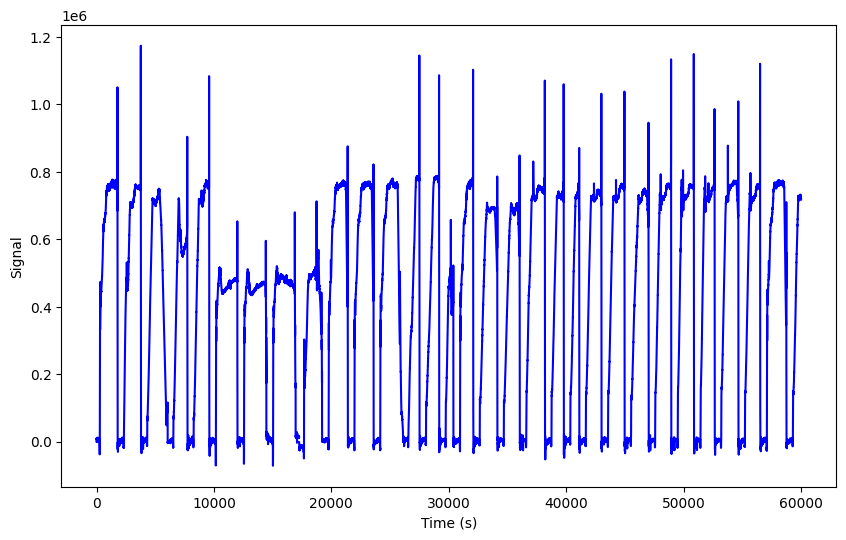

In [35]:
mask0 = (index == 1)

figure, ax = plt.subplots(figsize=(10, 6))
ax.plot(ip_values[:60000], label="Shot 0", color="blue")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal")
plt.show()


### 2. NaN proportion for each variables

Goal: find empty variables


In [36]:
def compute_nan_proportions_variables(data: xr.Dataset, sorted: bool = False, ascend_sorting: bool = False) -> pd.DataFrame:
    """
    Compute the proportion of NaN values for each variable in the dataset.

    Parameters
    data_train (xr.Dataset): The input dataset containing variables to analyze.
    sorted (bool): If True, sort the results by NaN proportion in descending order.

    Returns
    pd.DataFrame: A DataFrame containing the variable names, channel names (if applicable), and their NaN proportions.
    """
    results = []
    best_channel = []

    # Parcours des variables du Dataset
    for var_name, da in data.data_vars.items():
        dims = da.dims
        
        if 'time' not in dims:
            # Skip variables that do not have a time dimension
            continue

        if len(dims) == 1:
            # 1D variable (time)
            total = da.sizes['time']
            n_nan = da.isnull().sum().item()
            prop = 100 * n_nan / total
            results.append((var_name, None, prop))
            if prop < 1.:
                best_channel.append((var_name, None, prop))


        elif len(dims) == 2:
            # 2D variable (time, channel)
            time_dim, channel_dim = dims
            for i, channel in enumerate(data[channel_dim].values):
                series = da.isel({channel_dim: i})
                total = series.sizes[time_dim]
                n_nan = series.isnull().sum().item()
                prop = 100 * n_nan / total
                results.append((var_name, str(channel), prop))
                if prop < 1.:
                    best_channel.append((var_name, str(channel), prop))

    df_nan_stats = pd.DataFrame(results, columns=['variable', 'channel', 'nan_ratio'])

    if sorted:
        df_nan_stats = df_nan_stats.sort_values(by='nan_ratio', ascending=ascend_sorting).reset_index(drop=True)

    return df_nan_stats, best_channel

In [37]:
result_var, best_channels = compute_nan_proportions_variables(data=data_train, sorted=True, ascend_sorting=True)
result_var

KeyboardInterrupt: 

In [18]:
print("Number of variables with NaN proportions less than 1%: ", len(best_channels))
for chan in best_channels:
    print(f"Variable: {chan[0]}, Channel: {chan[1]}, NaN Proportion: {chan[2]}")

Number of variables with NaN proportions less than 1%:  68
Variable: flux_loop_flux, Channel: AMB_FL/CC03, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC04, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC05, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC07, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC09, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P3U/1, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P3U/4, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P4L/1, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P4L/4, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P4U/4, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P5L/1, NaN Proportion: 0.033657082411770366


In [20]:
file_path = "notebooks/result_files/nan_stats"
path = pathlib.Path().absolute().parent.parent / file_path / f"nan_stats_by_vars{suffix}.csv"
result_var.to_csv(path, index=False)

### 3. NaN proportion for each shot per variables

Goals: Delete shots where too many NaN

In [ ]:
def compute_nan_proportions_shots(data: xr.Dataset, sorted: bool = False, ascend_sorting: bool = False) -> pd.DataFrame:
    """
    Compute the proportion of NaN values for each variable in the dataset, grouped by shot.

    Parameters
    data (xr.Dataset): The input dataset containing variables to analyze.
    sorted (bool): If True, sort the results by NaN proportion in descending order.
    ascend_sorting (bool): If True, sort in ascending order; if False, sort in descending order.

    Returns
    pd.DataFrame: A DataFrame containing the variable names, channel names (if applicable), and their NaN proportions per shot.
    """

    shot_index = data['shot_index'].values
    unique_shots = np.unique(shot_index)

    results = []

    for var_name, da in data.data_vars.items():
        dims = da.dims

        if 'time' not in dims:
            continue

        if len(dims) == 1:
            # 1D variable (time)
            row = {'variable': var_name, 'channel': None}
            for shot in unique_shots:
                shot_mask = (shot_index == shot)
                total = shot_mask.sum()
                n_nan = da.isnull().values[shot_mask].sum()
                row[f'shot_{shot}'] = 100 * n_nan / total if total > 0 else np.nan
            results.append(row)

        elif len(dims) == 2:
            # 2D variable (time, channel)
            _, channel_dim = dims
            for i, channel_val in enumerate(data[channel_dim].values):
                row = {'variable': var_name, 'channel': str(channel_val)}
                series = da.isel({channel_dim: i})
                for shot in unique_shots:
                    shot_mask = (shot_index == shot)
                    total = shot_mask.sum()
                    n_nan = series.isnull().values[shot_mask].sum()
                    row[f'shot_{shot}'] = 100 * n_nan / total if total > 0 else np.nan
                results.append(row)

    df_nan_by_shot = pd.DataFrame(results)

    if sorted:
        # Find the maximum NaN proportion across all shots for each variable/channel
        max_nan_cols = [col for col in df_nan_by_shot.columns if col.startswith('shot_')]
        df_nan_by_shot['max_nan_ratio'] = df_nan_by_shot[max_nan_cols].max(axis=1)
        df_nan_by_shot = df_nan_by_shot.sort_values(by='max_nan_ratio', ascending=ascend_sorting).reset_index(drop=True)
    
    return df_nan_by_shot

In [72]:
result_per_shot = compute_nan_proportions_shots(data=data_train, sorted=False)
result_per_shot

,variable,channel,shot_0,shot_1,shot_2,shot_3,shot_4,shot_5,shot_6,shot_7,...,shot_260,shot_261,shot_262,shot_263,shot_264,shot_265,shot_266,shot_267,shot_268,shot_269
0,flux_loop_flux,AMB_FL/CC03,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
1,flux_loop_flux,AMB_FL/CC04,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
2,flux_loop_flux,AMB_FL/CC05,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
3,flux_loop_flux,AMB_FL/CC07,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
4,flux_loop_flux,AMB_FL/CC09,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,b_field_pol_probe_obv_field,AMB_OBV15,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
113,b_field_pol_probe_obv_field,AMB_OBV16,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
114,b_field_pol_probe_obv_field,AMB_OBV17,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
115,b_field_pol_probe_obv_field,AMB_OBV18,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0


In [ ]:
file_path = f"notebooks/result_files/nan_stats_{group}"
path = pathlib.Path().absolute().parent.parent / file_path / f"nan_stats_by_shot{suffix}.csv"
result_per_shot.to_csv(path, index=False)